In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats 

candy = pd.read_csv("C:\AI_HW/candy-data.csv")

candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [25]:
candy.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [26]:
X=candy.drop(['pricepercent', 'competitorname'],axis=1)
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,52.341465
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,41.904308


In [27]:
y = pd.get_dummies(candy['pricepercent']).values
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [29]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (11,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                768       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [33]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 7s 3s/step - loss: 0.0948 - mse: 0.0948 - val_loss: 0.0564 - val_mse: 0.0564
Epoch 2/100
2/2 [==============================] - 2s 2s/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0485 - val_mse: 0.0485
Epoch 3/100
2/2 [==============================] - 1s 814ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 4/100
2/2 [==============================] - 1s 947ms/step - loss: 0.0415 - mse: 0.0415 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 6/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - mse: 0.0354

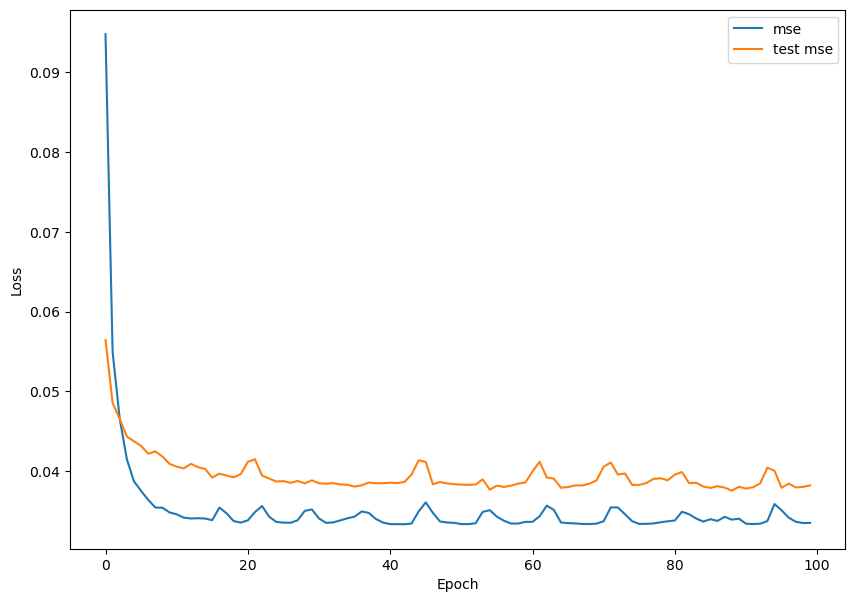

In [34]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 35ms/step - loss: 0.0382 - mse: 0.0382


[0.03819684684276581, 0.03819684684276581]